# Data Analysis of the Indian Pines hyperspectral image dataset

This notebook depicts different visualizations of the indian pines dataset.

### 1. Importing modules 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### 2. Read the dataset

In [9]:
df = pd.read_csv('Dataset.csv')

Showing initial 5 rows of the dataset

### 3. Analysis

In [10]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


Showing randomly 6 rows of the dataset

In [11]:
df.sample(6)

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
6580,3868,4377,4882,4723,5329,5676,5876,5823,5814,5657,...,1120,1132,1131,1097,1084,1091,1051,1039,1019,2
11228,2761,4244,4570,4416,4767,5174,5150,5112,5045,4821,...,1115,1106,1116,1093,1066,1084,1063,1023,1018,11
18178,3317,4095,4108,4043,4276,4640,4649,4482,4486,4189,...,1057,1050,1044,1049,1033,1030,1026,1005,1009,5
2273,4016,4638,4979,4871,5333,5879,5958,6037,6004,5764,...,1135,1134,1142,1123,1086,1110,1073,1020,1024,11
18287,2560,4105,4397,4489,4778,5192,5224,5100,5138,4916,...,1094,1097,1099,1086,1061,1071,1046,1027,1013,3
20716,3159,3871,4209,4039,4462,4782,4790,4661,4625,4345,...,1066,1059,1067,1061,1048,1050,1025,1013,1008,0


In [12]:
print(f'Shape of the data: {df.shape}')

Shape of the data: (21025, 201)


In [15]:
print(f"Unique Class Labels: {df.loc[:, 'class'].unique()}")

Unique Class Labels: [ 3  0 15 11 12  5 10 14 16  2  4  8  6  9  1  7 13]


In [19]:
df.loc[:, 'class'].value_counts()

0     10776
11     2455
2      1428
14     1265
10      972
3       830
6       730
12      593
5       483
8       478
15      386
4       237
13      205
16       93
1        46
7        28
9        20
Name: class, dtype: int64

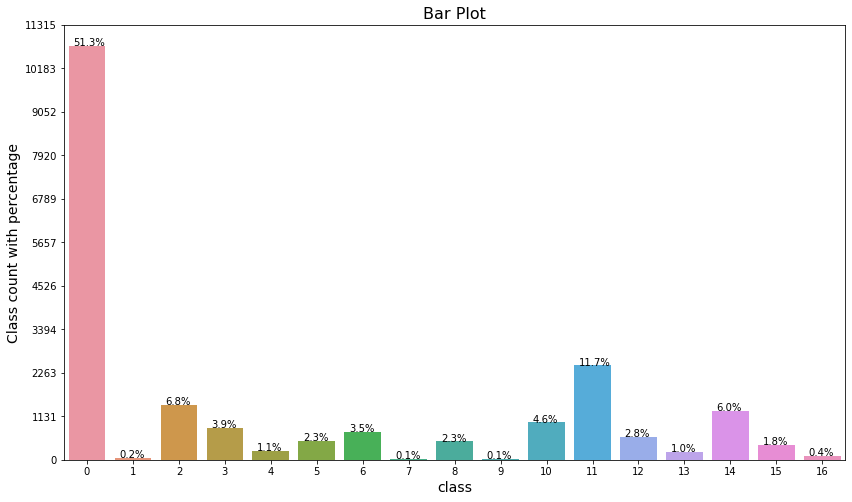

In [42]:
plt.figure(figsize=(14, 8))

ax = sns.countplot(x='class', data=df[['class']])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/df.shape[0]), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

plt.ylabel('Class count with percentage', fontsize=14)

plt.xlabel('class', fontsize=14)

plt.title('Bar Plot', fontsize=16)

plt.show()

### 4. Visualizing pixels of the Indian Pines HSI

Usually the pixel of the indian pines HSI is a one dimensional vector with size (1, 200) ad the HSI has 200 bands.

To visualize a vector is shown below:

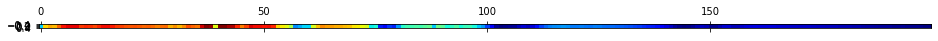

In [54]:
# Visualizing the pixel
plt.matshow(df.iloc[1, :-1].values.reshape(1,200), cmap='jet');

It is difficult to interpret the visualization of a vetor. So, to overcome this problem the pixel vector is reshape into a 2-Dimensional array.
* 200 => 10 X 20
* (1, 200) => (10, 20)

In [74]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_pixel(pixel, n):
    ax = plt.gca()
    im = ax.imshow(pixel.reshape(10, 20), cmap = 'jet')
    plt.title(f'pixel - {n}')
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

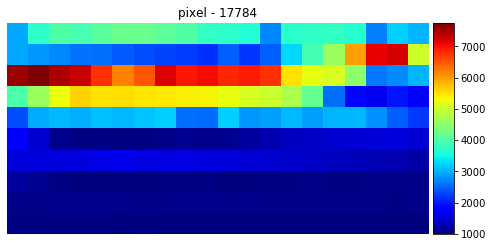

In [91]:
plt.figure(figsize=(8, 4))

rand_n = np.random.randint(df.shape[0])

plot_pixel(df.iloc[rand_n, :-1].values, rand_n)

### 5. Box plot w.r.t bands of the HSI

Enter the band Number(1-200) :11


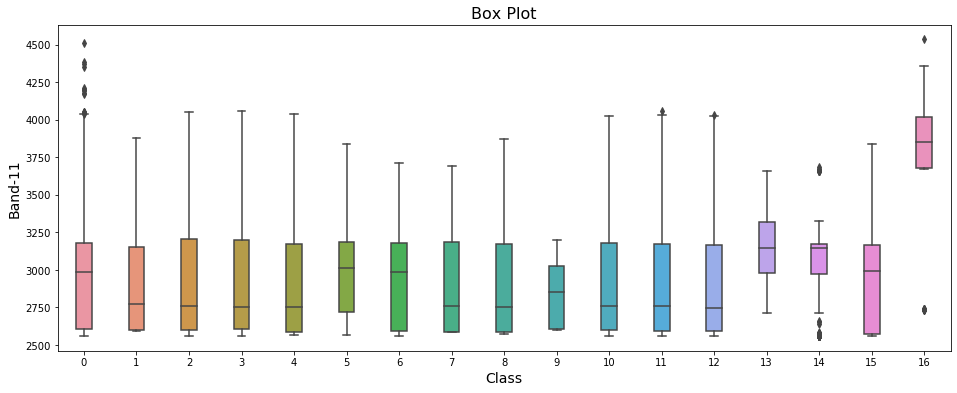

In [106]:
plt.figure(figsize=(16, 6))
n = int(input('Enter the band Number(1-200) :'))
sns.boxplot( x=df["class"], y=df["band-1"], width=0.3);
plt.title('Box Plot', fontsize= 16)
plt.xlabel('Class', fontsize= 14)
plt.ylabel(f'Band-{n}', fontsize= 14)
plt.show()

### 6. Distribution Plot

In [117]:
print(f"Details of Band - {n}: \n\n{df['band-'+str(n)].describe()}")

Details of Band - 11: 

count    21025.000000
mean      4407.192580
std        596.191887
min       2700.000000
25%       3872.000000
50%       4362.000000
75%       4871.000000
max       7990.000000
Name: band-11, dtype: float64


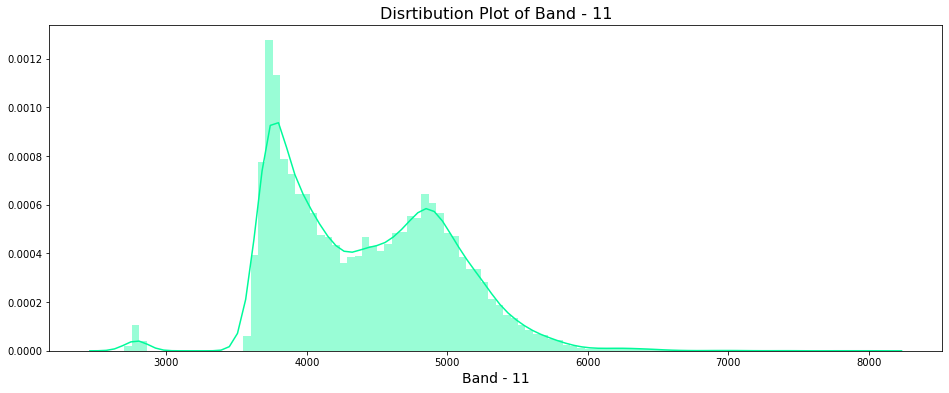

In [125]:
plt.figure(figsize=(16, 6))
sns.distplot(df['band-'+str(n)], color='mediumSpringGreen', bins=100, hist_kws={'alpha': 0.4});
plt.xlabel('Band - '+str(n), fontsize=14)
plt.title('Disrtibution Plot of Band - '+str(n), fontsize=16)
plt.show()

# Do star if you like the repository